<a href="https://colab.research.google.com/github/ripunjaysingh88/ML_Model_from_Scratch/blob/main/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [195]:
iris = datasets.load_iris()
iris.data.shape 

(150, 4)

In [196]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [197]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [198]:
X = iris.data[:, :2]
X.shape

(150, 2)

In [199]:
y = iris.target
y.shape

(150,)

Text(0, 0.5, 'Sepel width')

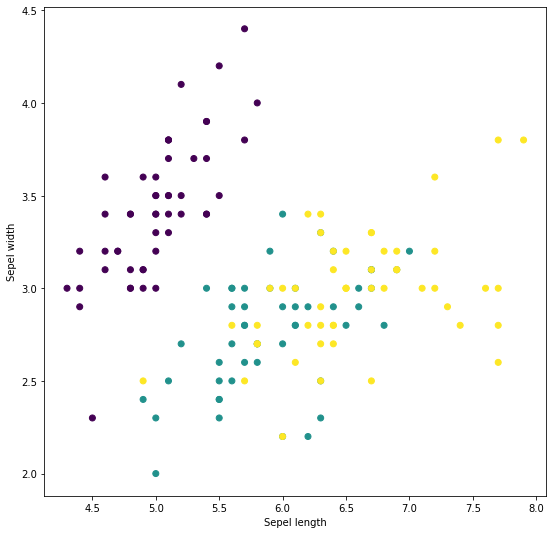

In [200]:
plt.figure(figsize=(9,9))
plt.scatter(X[:, 0], X[:,1], c = y)
plt.xlabel('Sepel length')
plt.ylabel('Sepel width')

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=42)

In [202]:
X_train.shape , y_test.shape

((120, 2), (30,))

In [203]:
class custom_KNN:
  def __init__(self,k):
    self.k = k
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  
  def predict(self,X_test):

    #calculate the distances using numpy for faster computation insted of for loops.
     distances = np.sqrt(((X_test[:,np.newaxis]- self.X_train)**2). sum(axis=2))

    # store the index of sorted distances matrix to access label from y_train
     sorted_distances_index = np.argsort(distances, axis=1)

     #get label
     k_closet_distance = self.y_train[sorted_distances_index[ :, :self.k]].astype(int)

     # majority voting to prredict the sample class 
     predicted_label = np.zeros(X_test.shape[0])
     for i in range(X_test.shape[0]):
       predicted_label[i] = np.argmax(np.bincount(k_closet_distance[i]))
     return predicted_label


In [204]:
knn = custom_KNN(6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [205]:
print("Accuracy : {}".format(accuracy_score(y_test, y_pred)))

Accuracy : 0.7666666666666667


In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30



In [207]:
# comparing with sk-learn library
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)
sk_y_pred = neigh.predict(X_test)

In [208]:
print("Accuracy : {}".format(accuracy_score(y_test,sk_y_pred)))

Accuracy : 0.7666666666666667


In [209]:
print(classification_report(y_test,sk_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30

